<a href="https://colab.research.google.com/github/nilberthsouza/Synthetic-Financial-Datasets-For-Fraud-Detection/blob/master/edaTheseAndModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline

#!pip install category_encoders



     |████████████████████████████████| 102kB 2.3MB/s 


In [52]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.3)


In [2]:
df = pd.read_csv("sample_data/synt.csv")
print(df.tail())

        step      type     amount  ... newbalanceDest  isFraud  isFlaggedFraud
314694    16  CASH_OUT  359950.11  ...     2717203.17      0.0             0.0
314695    16   PAYMENT    4032.79  ...           0.00      0.0             0.0
314696    16   CASH_IN  114371.60  ...      633156.15      0.0             0.0
314697    16   PAYMENT   13415.82  ...           0.00      0.0             0.0
314698    16   CASH_IN      65.00  ...            NaN      NaN             NaN

[5 rows x 11 columns]


In [5]:
df['varoldbalanceOrg'] = df.amount/df['oldbalanceOrg']
df['varoldbalanceDest'] = df.amount/df['oldbalanceDest']


df.varoldbalanceOrg.fillna(1,inplace=True)
df.varoldbalanceDest.fillna(1,inplace=True)

#certifica que celulas não fiquem com valor inf 
df.varoldbalanceOrg = df.varoldbalanceOrg.map(lambda a: 1 if a == np.inf else a)
df.varoldbalanceDest = df.varoldbalanceDest.map(lambda a: 1 if a == np.inf else a)

df.dropna(inplace=True)
df.isnull().sum()

step                 0
type                 0
amount               0
nameOrig             0
oldbalanceOrg        0
newbalanceOrig       0
nameDest             0
oldbalanceDest       0
newbalanceDest       0
isFraud              0
isFlaggedFraud       0
varoldbalanceOrg     0
varoldbalanceDest    0
dtype: int64

In [6]:
print((df['isFraud'].value_counts()[1]/df['isFraud'].value_counts()[0])*100,"%")
print("Max", df.amount[df.isFraud == 1 ].max())
print("Max amount",df.amount.max())
print("dif max amount/max fraud", df.amount.max()/df.amount[df.isFraud == 1].max())


0.05945737986906659 %
Max 10000000.0
Max amount 10000000.0
dif max amount/max fraud 1.0


In [10]:
%%timeit
for i in range(1000):
  pass

100000 loops, best of 3: 17.6 µs per loop


In [13]:
import time
start = time.time()

df['maiormenor'] = 0
maxminvalue = df.amount[df.isFraud == 1].max()
minvalue = df.amount.min()

for i in range(len(df.isFraud)):
    if df['amount'][i] < (maxminvalue + minvalue):
        df['maiormenor'][i] = 1
    else:
        df['maiormenor'][i] = 0
end = time.time()
print(end-start)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


37.44317412376404


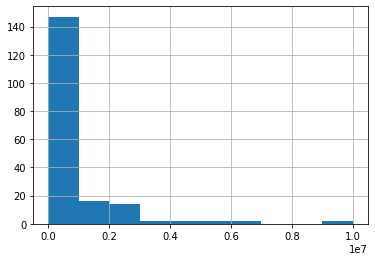

In [14]:
df.amount[df.isFraud == 1].hist()

In [0]:

from category_encoders.one_hot import OneHotEncoder

enc = OneHotEncoder(cols=['type'], use_cat_names=True)
enc.fit(df)
df_ohe = enc.transform(df)


In [40]:
df = df_ohe
df.drop(['step','nameOrig','nameDest'],axis=0,inplace=True)

KeyError: ignored

In [44]:
df = df.sample(frac=1)
df = df.sample(frac=1)
df = df.sample(frac=1)
df.reset_index(inplace=True)
X_train, X_test , y_train, y_test = train_test_split(df.drop(['isFraud'],axis=1),df['isFraud'],test_size=0.3, random_state=0)

print(len(X_train),len(X_test),len(y_train),len(y_test))



220288 94410 220288 94410


In [43]:
df.drop(['nameDest'],axis=1,inplace=True)
df.head()


,type_PAYMENT,type_CASH_OUT,type_CASH_IN,type_TRANSFER,type_DEBIT,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,varoldbalanceOrg,varoldbalanceDest,maiormenor
14848,1,0,0,0,0,11928.99,0.0,0.00,0.00,0.00,0.0,0.0,1.000000,1.000000,1
168393,0,1,0,0,0,28329.76,98320.0,69990.24,21329.00,49658.76,0.0,0.0,0.288138,1.328227,1
76481,0,1,0,0,0,50789.01,226640.0,175850.99,320237.10,964028.56,0.0,0.0,0.224096,0.158598,1
138200,0,0,1,0,0,156841.62,20411.0,177252.62,144396.99,0.00,0.0,0.0,7.684171,1.086183,1
269384,0,1,0,0,0,170627.70,1494.0,0.00,85054.20,255681.90,0.0,0.0,114.208635,2.006106,1


In [47]:
X_train.head()

,index,type_PAYMENT,type_CASH_OUT,type_CASH_IN,type_TRANSFER,type_DEBIT,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,varoldbalanceOrg,varoldbalanceDest,maiormenor
109251,4373,1,0,0,0,0,1950.33,334103.00,332152.67,0.00,0.00,0.0,0.005838,1.000000,1
250693,82332,1,0,0,0,0,17094.82,54239.32,37144.50,0.00,0.00,0.0,0.315174,1.000000,1
127810,139845,0,0,1,0,0,75954.02,0.00,75954.02,153767.36,77813.33,0.0,1.000000,0.493954,1
116161,54836,1,0,0,0,0,5371.85,14781.00,9409.15,0.00,0.00,0.0,0.363429,1.000000,1
22928,4567,1,0,0,0,0,736.76,1120.00,383.24,0.00,0.00,0.0,0.657821,1.000000,1


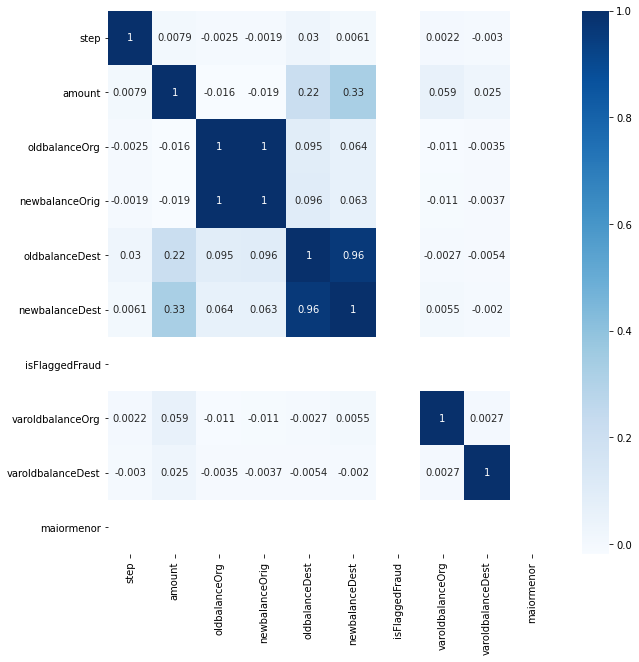

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed7c35ad30>,
      dtype=object)

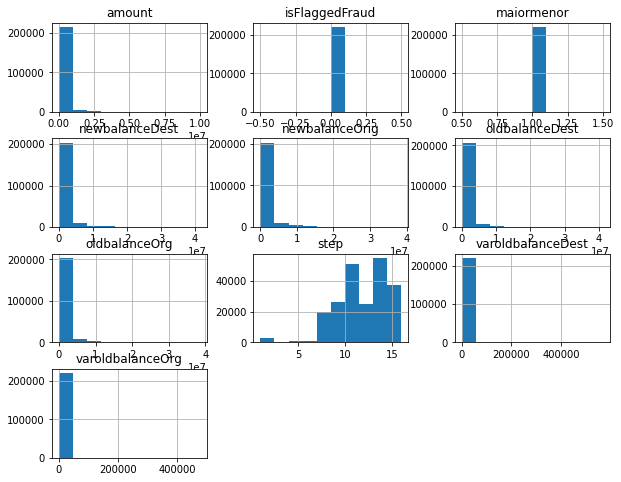

In [20]:
train.hist(figsize=(10,8))

Text(0.5, 1.0, 'Type')

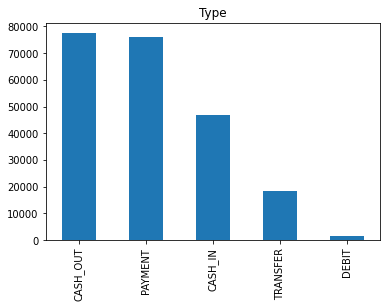

In [21]:
train.type.value_counts().plot(kind="bar")
plt.title("Type")

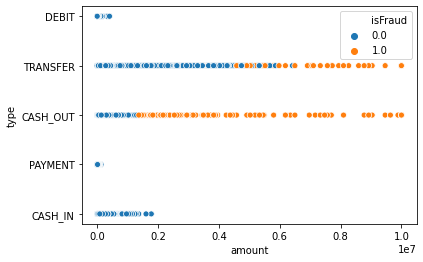

In [0]:
sns.scatterplot(x=train.amount,y=train.type, hue=train.isFraud)

In [23]:
print(train.amount[train.isFraud == 0].value_counts().mean())
print(train.amount[train.isFraud == 1].value_counts().mean())

AttributeError: ignored

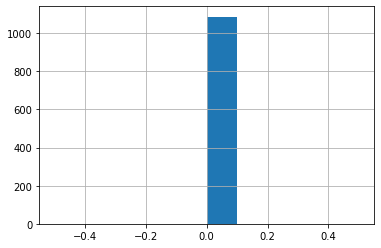

In [0]:
train.isFlaggedFraud[train.isFraud == 1].hist()


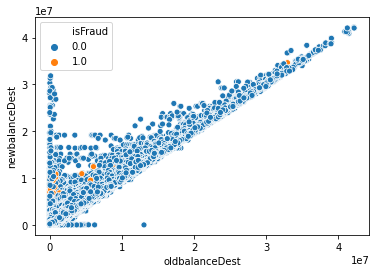

In [0]:
sns.scatterplot(x = train.oldbalanceDest,y=train.newbalanceDest,hue=df.isFraud)


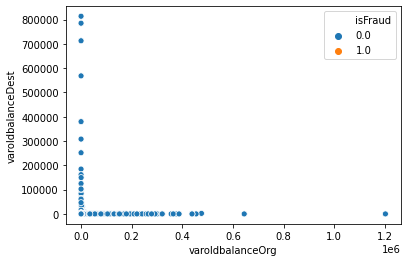

In [0]:
sns.scatterplot(x=df['varoldbalanceOrg'],y=df['varoldbalanceDest'],hue=df.isFraud)

In [38]:
train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,varoldbalanceOrg,varoldbalanceDest,maiormenor
65195,9,CASH_OUT,368215.64,C1369424204,41760.00,0.00,C968852538,50718.09,418933.73,0.0,8.817424,7.260045,1
112189,11,TRANSFER,102282.10,C1948472600,0.00,0.00,C750027742,269006.39,318586.55,0.0,1.000000,0.380222,1
83233,10,CASH_IN,276709.64,C370319776,148228.36,424938.00,C918594222,292983.86,0.00,0.0,1.866779,0.944454,1
200498,13,CASH_OUT,37597.15,C2104990025,0.00,0.00,C1009574362,467608.44,505205.59,0.0,1.000000,0.080403,1
184414,13,CASH_IN,248965.44,C547026278,438.00,249403.44,C1523838585,13099.00,0.00,0.0,568.414247,19.006446,1


In [25]:

from category_encoders.one_hot import OneHotEncoder

enc = OneHotEncoder(cols=['type'], use_cat_names=True)
enc.fit(df)
df_ohe = enc.transform(df)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,varoldbalanceOrg,varoldbalanceDest,maiormenor
14848,8,PAYMENT,11928.99,C666105045,0.0,0.00,M608045763,0.00,0.00,0.0,0.0,1.000000,1.000000,1
168393,12,CASH_OUT,28329.76,C1312289667,98320.0,69990.24,C1132568804,21329.00,49658.76,0.0,0.0,0.288138,1.328227,1
76481,10,CASH_OUT,50789.01,C395978962,226640.0,175850.99,C1787521094,320237.10,964028.56,0.0,0.0,0.224096,0.158598,1
138200,11,CASH_IN,156841.62,C866023183,20411.0,177252.62,C130952738,144396.99,0.00,0.0,0.0,7.684171,1.086183,1
269384,15,CASH_OUT,170627.70,C32360564,1494.0,0.00,C925574515,85054.20,255681.90,0.0,0.0,114.208635,2.006106,1


In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

modelOnePredictions = model.predict(X_test)

from sklearn.metrics import classification_report

classification_report( y_test, modelOnePredictions)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00     94362\n         1.0       0.54      0.31      0.39        48\n\n    accuracy                           1.00     94410\n   macro avg       0.77      0.66      0.70     94410\nweighted avg       1.00      1.00      1.00     94410\n'

In [49]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,modelOnePredictions)

0.9995127634784451